In [14]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import imutils
import cv2

In [15]:
def applyGrayScale(image):
  imageGray = []
  for pixel in image:
      lineGray = []
      for r, g, b in pixel:
          media = int(0.3 * r + 0.59 * g + 0.11 * b)
          lineGray.append(media)
      imageGray.append(lineGray)
 
  return imageGray
 
def applyBinary(image, limit, max = 255, min = 0):
  newImage = []
  for line in image:
    newLine = []
    for pixel in line:
      newPixel = max if pixel > limit else min
      newLine.append(newPixel)
    newImage.append(newLine)
 
  return newImage
 
def applyFilter(image, filter):
  height = len(image) - 1
  width = len(image[0]) - 1
 
  newImage = []
  for i in range(1, height):
    newLine = []
    for j in range(1, width):
      newPixel = (
          (image[i-1][j-1] * filter[0][0]) +
          (image[i][j-1] * filter[1][0]) +
          (image[i+1][j-1] * filter[2][0]) +
          (image[i-1][j+1] * filter[0][2]) +
          (image[i][j+1] * filter[1][2]) +
          (image[i+1][j+1] * filter[2][2]) +
          (image[i-1][j] * filter[0][1]) +
          (image[i][j] * filter[1][1]) +
          (image[i+1][j] * filter[2][1])
      )
      newLine.append(abs(newPixel))
    newImage.append(newLine)
 
  return newImage
 
def applySobelV(image):
  filter = [[1, 0, -1],
            [2, 0, -2],
            [1, 0, -1]]
 
  return applyFilter(image, filter)
 
def applySobelH(image):
  filter = [[ 1,  2,  1],
            [ 0,  0,  0],
            [-1, -2, -1]]
 
  return applyFilter(image, filter)
 
def normalize(image):
  return (image * (255.0/image.max()))
 
def applySobel(image):
  imageSobelV = applySobelV(image)
  imageSobelH = applySobelH(image)
 
  imageSobel = normalize(np.array(imageSobelV) + np.array(imageSobelH))
  binary = applyBinary(imageSobel, 50)
 
  return np.array(binary, dtype='uint8')

In [16]:
def applyGrayScale(image):
  imageGray = []
  for pixel in image:
      lineGray = []
      for r, g, b in pixel:
          media = int(0.3 * r + 0.59 * g + 0.11 * b)
          lineGray.append(media)
      imageGray.append(lineGray)

  return imageGray

def applyBinary(image, limit, max = 255, min = 0):
  newImage = []
  for line in image:
    newLine = []
    for pixel in line:
      newPixel = max if pixel > limit else min
      newLine.append(newPixel)
    newImage.append(newLine)

  return newImage

def applyFilter(image, filter):
  height = len(image) - 1
  width = len(image[0]) - 1

  newImage = []
  for i in range(1, height):
    newLine = []
    for j in range(1, width):
      newPixel = (
          (image[i-1][j-1] * filter[0][0]) +
          (image[i][j-1] * filter[1][0]) +
          (image[i+1][j-1] * filter[2][0]) +
          (image[i-1][j+1] * filter[0][2]) +
          (image[i][j+1] * filter[1][2]) +
          (image[i+1][j+1] * filter[2][2]) +
          (image[i-1][j] * filter[0][1]) +
          (image[i][j] * filter[1][1]) +
          (image[i+1][j] * filter[2][1])
      )
      newLine.append(abs(newPixel))
    newImage.append(newLine)

  return newImage

def applySobelV(image):
  filter = [[1, 0, -1],
            [2, 0, -2],
            [1, 0, -1]]

  return applyFilter(image, filter)

def applySobelH(image):
  filter = [[ 1,  2,  1],
            [ 0,  0,  0],
            [-1, -2, -1]]

  return applyFilter(image, filter)

def normalize(image):
  return (image * (255.0/image.max()))

def applySobel(image):
  imageSobelV = applySobelV(image)
  imageSobelH = applySobelH(image)

  imageSobel = normalize(np.array(imageSobelV) + np.array(imageSobelH))
  binary = applyBinary(imageSobel, 50)

  return np.array(binary, dtype='uint8')

# Hexágono

In [17]:
image = io.imread('https://i.imgur.com/LpZ1EIg.jpg')

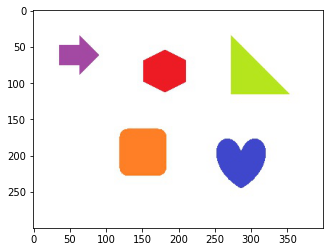

In [18]:
plt.imshow(image)

In [19]:
imageGray = applyGrayScale(image)
imageSobel = applySobel(imageGray)

In [20]:
cnts = cv2.findContours(
 imageSobel.copy(),
 cv2.RETR_EXTERNAL,
 cv2.CHAIN_APPROX_SIMPLE
)
cnts = imutils.grab_contours(cnts)

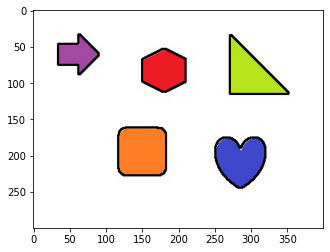

In [21]:
imageCnts = image.copy()
for c in cnts:
 cv2.drawContours(
 imageCnts, [c], -1, (0, 0, 0), 2
 )
plt.imshow(imageCnts)

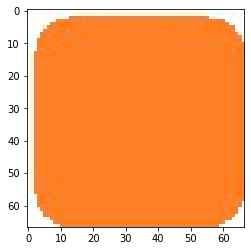

In [27]:
(x, y, w, h) = cv2.boundingRect(cnts[1])
crop = image[y:y+h, x:x+w]
plt.imshow(crop)